#Read Data

##Kaggle

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files

uploaded = files.upload()

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

TypeError: 'NoneType' object is not subscriptable

In [3]:
!pip install kaggle

In [4]:
!kaggle competitions download -c wongnai-food-review-rating-prediction-challenge

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [5]:
!unzip /content/wongnai-food-review-rating-prediction-challenge.zip

unzip:  cannot find or open /content/wongnai-food-review-rating-prediction-challenge.zip, /content/wongnai-food-review-rating-prediction-challenge.zip.zip or /content/wongnai-food-review-rating-prediction-challenge.zip.ZIP.


#Data Understanding

In [6]:
import pandas as pd
import numpy as np

In [ ]:
df_train = pd.read_csv('train_data.csv')
df_train

In [ ]:
df_test = pd.read_csv('test_data.csv')
df_test

,ID,review_body
0,40000,ร้านนี้จะอยู่เส้นสันกำแพง-แม่ออน เลยแยกบ่...
1,40001,สั่งไป2 เมนู คือมัชฉะลาเต้ร้อน กับ ไอศครีมชาเข...
2,40002,ครัววงเดือน \n\nหิวดึกๆ ตระเวนหาร้านทาน มาเจอ...
3,40003,จะว่าเป็นเจ้าประจำก็คงไม่ผิด แต่ก็ไม่กล้า...
4,40004,ถ้าคิดถึงสลัดผมคิดถึงร้านนี้เป็นร้านแรกๆเลยครั...
...,...,...
6198,46198,ร้านโรตีสายไหมพญาวัง อยู่ถนนรัตนโกสินทร์ หลังโ...
6199,46199,ข้าวผัดคอหมูย่าง ข้าวผัดมากลิ่นหอม คอหมูย่างอร...
6200,46200,ร้านอาหารมีหลายโซน แนะนำให้เดินดูก่อนค่อยเลือก...
6201,46201,ขนมปังร้านในเครือยามาซากิ จริงๆร้านนี้เปิ...


##Check Missing Values

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_body  40000 non-null  object
 1   star_rating  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6203 entries, 0 to 6202
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           6203 non-null   int64 
 1   review_body  6203 non-null   object
dtypes: int64(1), object(1)
memory usage: 97.0+ KB


In [ ]:
df_train.isnull().sum()

review_body    0
star_rating    0
dtype: int64

In [ ]:
df_test.isnull().sum()

ID             0
review_body    0
dtype: int64

##Data Visualization

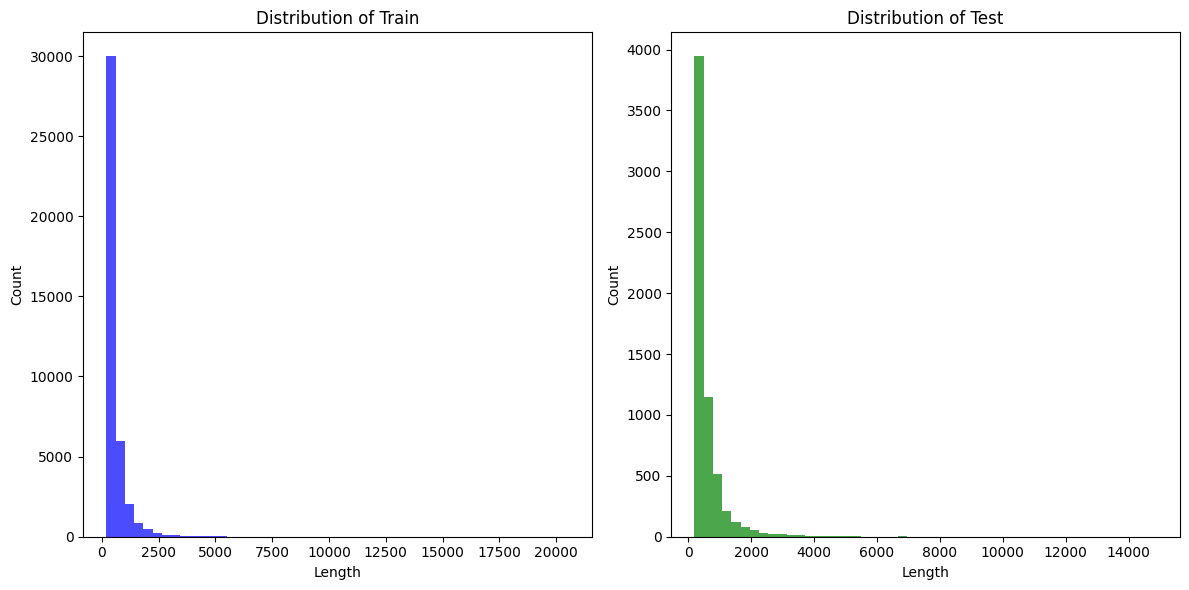

In [ ]:
import matplotlib.pyplot as plt

Train_lengths = [len(str(example)) for example in df_train['review_body']]
Test_lengths = [len(str(example)) for example in df_test['review_body']]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Train_lengths, bins=50, alpha=0.7, color='blue')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Train')

plt.subplot(1, 2, 2)
plt.hist(Test_lengths, bins=50, alpha=0.7, color='green')
plt.xlabel('Length')
plt.ylabel('Count')
plt.title('Distribution of Test')

plt.tight_layout()
plt.show()

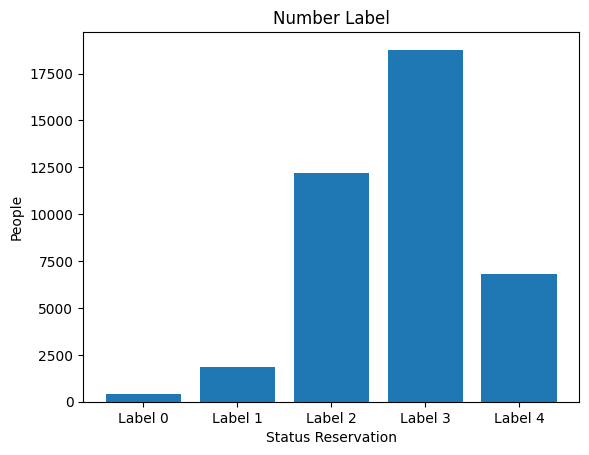

In [ ]:
count_label0 = df_train[df_train['star_rating'] == 0]['star_rating'].count()
count_label1 = df_train[df_train['star_rating'] == 1]['star_rating'].count()
count_label2 = df_train[df_train['star_rating'] == 2]['star_rating'].count()
count_label3 = df_train[df_train['star_rating'] == 3]['star_rating'].count()
count_label4 = df_train[df_train['star_rating'] == 4]['star_rating'].count()

plt.bar(['Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4'], [count_label0, count_label1, count_label2, count_label3, count_label4])
plt.xlabel('Status Reservation')
plt.ylabel('People')
plt.title('Number Label')
plt.show()

#Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split

wongnai_train, wongnai_eval = train_test_split(df_train, test_size=.2, random_state=42, stratify=df_train.star_rating)
wongnai_train.shape, wongnai_eval.shape

((32000, 2), (8000, 2))

In [ ]:
wongnai_test = df_test.copy()
wongnai_test.shape

(6203, 2)

In [ ]:
!pip -q install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 38.7 MB/s eta 0:00:00


In [ ]:
from pythainlp.tokenize import word_tokenize

wongnai_train['text'] = wongnai_train["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_train['labels'] = wongnai_train["star_rating"]
wongnai_train.labels = pd.Categorical(wongnai_train.labels)

wongnai_eval['text'] = wongnai_eval["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))
wongnai_eval['labels'] = wongnai_eval["star_rating"]
wongnai_eval.labels = pd.Categorical(wongnai_eval.labels)

wongnai_test['text'] = wongnai_test["review_body"].apply(lambda x: ' '.join(word_tokenize(x)))

In [ ]:
wongnai_train

,review_body,star_rating,text,labels
27877,สั่งsalmon wow มา อร่อยสมราคา(~390บาท) เนื้อปล...,3,สั่ง salmon wow มา อร่อย สมราคา (~390 บา...,3
802,ร้านCrystal Cuisineเป็นร้านอาหารที่ต้องบอกเลยว...,3,ร้าน Crystal Cuisine เป็น ร้านอาหาร ที่ ต้อง...,3
35078,จากที่อ่านรีวิวเป็นร้านที่ดังในหัวหิน ใครมาหัว...,3,จาก ที่ อ่าน รีวิว เป็น ร้าน ที่ ดัง ใน หัว หิ...,3
22177,ร้านนี้สมคำร่ำลือจริงๆครับ ตั้งแต่บรรยากาศในร้...,4,ร้าน นี้ สม คำ ร่ำ ลือ จริงๆ ครับ ตั้งแต่ บร...,4
22148,หลังจากทานขนมจีนเสร็จ หาขนมซะหน่อย สรุปว่ามีคน...,1,หลังจาก ทาน ขนมจีน เสร็จ หา ขนม ซะ หน่อย ส...,1
...,...,...,...,...
29746,สาขานี้แบ่งโซนที่นั่งเป็นสองโซนให้เลือกตามใจชอ...,3,สาขา นี้ แบ่ง โซน ที่นั่ง เป็น สอง โซน ให้ เลื...,3
33160,เมนูที่สั่งมีสตรอเบอร์รี่สมูทตี้ ไอศครีมทอด ทู...,3,เมนู ที่ สั่ง มี สตรอเบอร์รี่ สมูทตี้ ไอศครี...,3
31306,บรรยากาศ\nร้านอาหารตั้งอยู่บนเนินภายใน Resort ...,3,บรรยากาศ \n ร้านอาหาร ตั้งอยู่ บน เนิน ภายใน ...,3
347,พอดีได้ไปเรียนทำงานควิลท์ผ้าที่ศูนย์อาชีพบางพล...,2,พอดี ได้ ไป เรียน ทำ งา นค วิลท์ ผ้า ที่ ศูนย์...,2


In [ ]:
import numpy as np
import pandas as pd

num_labels = len(np.unique(np.array(wongnai_train['star_rating'])))
num_labels

5

#Modeling

In [ ]:
!pip -q install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6

## Pre Trained

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

model_args = {
    'reprocess_input_data': True,
    'train_batch_size': 32,
    'use_early_stopping': True,
    'early_stopping_delta': 0.01,
    'early_stopping_metric': 'mcc',
    'early_stopping_metric_minimize': False,
    'early_stopping_patience': 3,
    'evaluate_during_training_steps': 500,
    'fp16': False,
    'overwrite_output_dir': True,
    'use_cached_eval_features': False,
    'max_seq_length': 256,
    'no_cache': True,
    'num_train_epochs': 3,
    'custom_parameter_groups': [{
        'params': ['classifier.weight', 'bert.encoder.layer.10.output.dense.weight'],
        'lr': 1e-4,
    }]
}

In [ ]:
pretrained = "/content/drive/MyDrive/Sentiment Analysis/model_wongnai"
model = ClassificationModel(
    'auto',
    pretrained,
    use_cuda=torch.cuda.is_available(),
    args=model_args,
    num_labels=num_labels
)

### Evaluation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(wongnai_eval['labels'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Fine Tuning

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import sklearn

model_args = {
    'reprocess_input_data': True,
    'train_batch_size': 32,
    'use_early_stopping': True,
    'early_stopping_delta': 0.01,
    'early_stopping_metric': 'mcc',
    'early_stopping_metric_minimize': False,
    'early_stopping_patience': 3,
    'evaluate_during_training_steps': 500,
    'fp16': False,
    'overwrite_output_dir': True,
    'use_cached_eval_features': False,
    'max_seq_length': 256,
    'no_cache': True,
    'num_train_epochs': 3,
    'custom_parameter_groups': [{
        'params': ['classifier.weight', 'bert.encoder.layer.10.output.dense.weight'],
        'lr': 1e-4,
    }]
}

In [ ]:
import torch

pretrained = "monsoon-nlp/bert-base-thai"
model = ClassificationModel(
    'auto',
    pretrained,
    use_cuda=torch.cuda.is_available(),
    args=model_args,
    num_labels=num_labels
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/423M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at monsoon-nlp/bert-base-thai and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/489k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/113 [00:00<?, ?B/s]

In [ ]:
model.train_model(
    wongnai_train,
    show_running_loss=True,
    eval_df=wongnai_eval,
    accuracy_score=sklearn.metrics.accuracy_score
)

  0%|          | 0/64 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Running Epoch 3 of 3:   0%|          | 0/1000 [00:00<?, ?it/s]

(3000, 1.1290543405214946)

### Evaluation Model

In [ ]:
predictions, _ = model.predict(list(wongnai_eval['text']))
predictions

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

array([3, 3, 3, ..., 2, 3, 3])

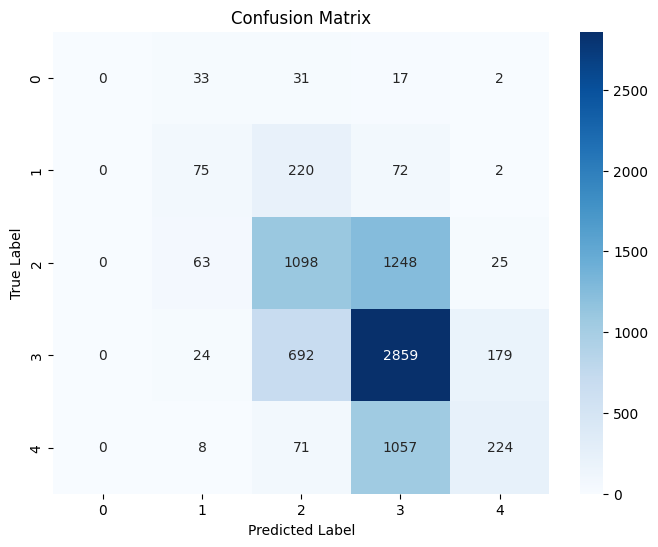

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(wongnai_eval['labels'], predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Submission

In [ ]:
answer, _ = model.predict(list(wongnai_test['text']))
answer

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

array([3, 2, 2, ..., 3, 3, 3])

In [ ]:
set(answer)

{1, 2, 3, 4}

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission

,ID,star_rating
0,40000,3.0
1,40001,2.0
2,40002,2.0
3,40003,NaN
4,40004,NaN
...,...,...
6198,46198,NaN
6199,46199,NaN
6200,46200,NaN
6201,46201,NaN


In [ ]:
submission['star_rating'] = answer
submission.to_csv('submission.csv', index=False)

In [ ]:
submission

,ID,star_rating
0,40000,3
1,40001,2
2,40002,2
3,40003,3
4,40004,3
...,...,...
6198,46198,3
6199,46199,2
6200,46200,3
6201,46201,3
